### 데이터 수집

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import seaborn as sns
import sklearn.metrics as metrics 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
import time

In [3]:
email = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')
del email['Unnamed: 2']
del email['Unnamed: 3']
del email['Unnamed: 4']
email.columns = ['label','text']

In [4]:
email.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


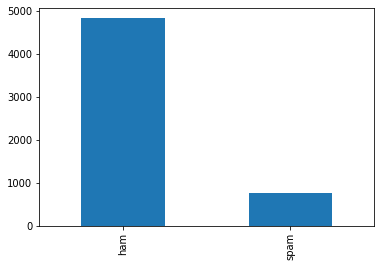

In [7]:
email.label.value_counts().plot.bar();

### 데이터 전처리

In [8]:
emails = email['text']
emails

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

### 문장 기호 제거

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuation(text):
    cleaned_text=''.join([char for char in text if char not in string.punctuation])
    cleaned_text= cleaned_text.lower()
    return cleaned_text

In [11]:
email['cleaned_text']=email['text'].apply(lambda row : remove_punctuation(row))
email.head()

,label,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [15]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') + ['u', 'ü', 'ur', 'im', 'dont', 'doin', 'ure']

lemma = WordNetLemmatizer() 

emails = email['cleaned_text']
emails

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: cleaned_text, Length: 5572, dtype: object

### 단어 원형화

In [16]:
def preprocessing(emails): 
    result = []
    for i in emails:
        clean = ''
        d = i.split()
        for j in d:
            if j not in stop_words and j.isalpha():
                clean += lemma.lemmatize(j,'v') + ' '
        result.append(clean)
    return result

In [19]:
email['cleaned_text'] = preprocessing(emails)
email

,label,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time try contact pound prize claim easy call p...
5568,ham,Will Ì_ b going to esplanade fr home?,ì b go esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like id interest buy something e...


### 단어 카운트


In [20]:
from collections import Counter

words = email[email.label=='ham'].cleaned_text.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for text in words:
    ham_words.update(text)
    
print(ham_words.most_common(50))

[('get', 594), ('go', 516), ('come', 318), ('call', 287), ('ltgt', 276), ('ok', 272), ('know', 257), ('like', 239), ('ill', 236), ('say', 224), ('good', 222), ('time', 219), ('love', 219), ('want', 212), ('think', 198), ('send', 193), ('tell', 191), ('day', 187), ('need', 175), ('see', 165), ('take', 162), ('make', 162), ('one', 162), ('home', 160), ('lor', 160), ('sorry', 153), ('still', 146), ('n', 134), ('later', 134), ('da', 131), ('work', 131), ('r', 131), ('back', 129), ('meet', 126), ('well', 126), ('ask', 126), ('today', 125), ('cant', 118), ('ì', 117), ('hi', 117), ('give', 116), ('miss', 116), ('much', 112), ('oh', 111), ('leave', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100)]


In [ ]:
words = email[email.label=='spam'].cleaned_text.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for text in words:
    spam_words.update(text)
    
print(spam_words.most_common(30))

In [21]:
hamWords = email[email['label'] == 'ham'].cleaned_text
spamWords = email[email['label'] == 'spam'].cleaned_text

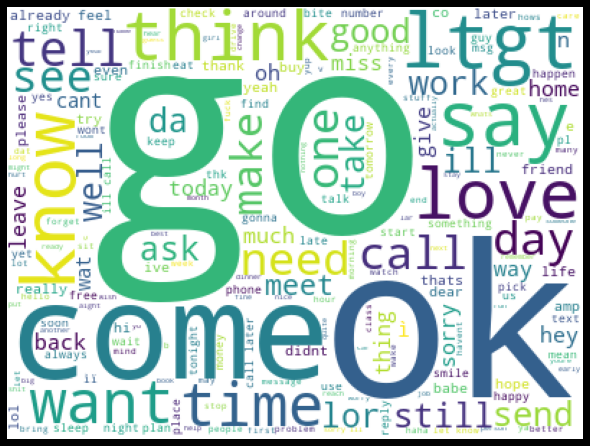

In [22]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud(background_color='white',width=400, height=300).generate(" ".join(hamWords))
plt.figure( figsize=(8,6), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud(background_color='black',width=400, height=300).generate(" ".join(spamWords))
plt.figure( figsize=(8,6), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 데이터 학습


In [24]:
X = email.cleaned_text
y = email.label

### 데이터 분리

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [26]:
print(y_train.value_counts())

ham     3849
spam     608
Name: label, dtype: int64


In [27]:
print(X_train)

1642                                  sleep nt feel well 
2899                   come aftr ltdecimalgt clean house 
480                                       almost see sec 
3485                               yeah probably earlier 
157     hello love get interview today happy good boy ...
                              ...                        
905                   hey whats charles sorry late reply 
5192      oh oh den muz change plan liao go back yan jiu 
3980                        huh cant thk oredi many page 
235                          print oh ltgt come upstairs 
5157                                        k k sms chat 
Name: cleaned_text, Length: 4457, dtype: object


In [28]:
print(y_test.value_counts())

ham     976
spam    139
Name: label, dtype: int64


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [30]:
print(X_train)
print(X_train.shape)

1642                                  sleep nt feel well 
2899                   come aftr ltdecimalgt clean house 
480                                       almost see sec 
3485                               yeah probably earlier 
157     hello love get interview today happy good boy ...
                              ...                        
905                   hey whats charles sorry late reply 
5192      oh oh den muz change plan liao go back yan jiu 
3980                        huh cant thk oredi many page 
235                          print oh ltgt come upstairs 
5157                                        k k sms chat 
Name: cleaned_text, Length: 4457, dtype: object
(4457,)


In [31]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm)

  (0, 4929)	1
  (0, 3763)	1
  (0, 1833)	1
  (0, 6001)	1
  (1, 1038)	1
  (1, 103)	1
  (1, 3188)	1
  (1, 986)	1
  (1, 2491)	1
  (2, 170)	1
  (2, 4730)	1
  (2, 4720)	1
  (3, 6240)	1
  (3, 4271)	1
  (3, 1568)	1
  (4, 2361)	1
  (4, 3167)	1
  (4, 2105)	1
  (4, 2682)	1
  (4, 5563)	1
  (4, 2307)	1
  (4, 2163)	1
  (4, 650)	1
  (4, 5483)	1
  (4, 3326)	1
  :	:
  (4452, 3000)	1
  (4452, 890)	1
  (4453, 2142)	1
  (4453, 3820)	2
  (4453, 418)	1
  (4453, 4106)	1
  (4453, 3580)	1
  (4453, 3056)	1
  (4453, 882)	1
  (4453, 1340)	1
  (4453, 6231)	1
  (4453, 2796)	1
  (4454, 3890)	1
  (4454, 805)	1
  (4454, 5489)	1
  (4454, 2524)	1
  (4454, 3273)	1
  (4454, 3945)	1
  (4455, 1038)	1
  (4455, 3191)	1
  (4455, 3820)	1
  (4455, 4257)	1
  (4455, 5788)	1
  (4456, 896)	1
  (4456, 4968)	1


In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)

token_import_mat = tfidf_transformer.transform(X_train_dtm) 
print(token_import_mat)

  (0, 6001)	0.42577187375198217
  (0, 4929)	0.47205818826144663
  (0, 3763)	0.619011715918957
  (0, 1833)	0.46119830222163144
  (1, 3188)	0.4566914786102768
  (1, 2491)	0.42988035427483573
  (1, 1038)	0.27530047957247133
  (1, 986)	0.5009052010978073
  (1, 103)	0.5290929973394407
  (2, 4730)	0.38710388293783393
  (2, 4720)	0.6930817707227604
  (2, 170)	0.6081021648590429
  (3, 6240)	0.49988033039435464
  (3, 4271)	0.5804130743553378
  (3, 1568)	0.6428377076698409
  (4, 5563)	0.2503228596830984
  (4, 5483)	0.22950214041971667
  (4, 3431)	0.2664749394438024
  (4, 3326)	0.46455863297163463
  (4, 3167)	0.23355526470002902
  (4, 2682)	0.41568325119507155
  (4, 2361)	0.3103848339477974
  (4, 2307)	0.2796946378512058
  (4, 2163)	0.22453665314714868
  (4, 2105)	0.16951053618342946
  :	:
  (4452, 2390)	0.3473760112722645
  (4452, 890)	0.5774035665303973
  (4453, 6231)	0.3638372329146536
  (4453, 4106)	0.2644273692061062
  (4453, 3820)	0.470900834525961
  (4453, 3580)	0.33941668315666984
  (4453

### 서포트 벡터 머신

In [33]:
from sklearn.svm import SVC

svm_X = email.cleaned_text
svm_y = email.label

In [34]:
from sklearn.model_selection import train_test_split
svmX_train, svmX_test, svmy_train, svmy_test = train_test_split(svm_X, svm_y, test_size = 0.2,random_state=1)
svmX_train_dtm = vect.fit_transform(svmX_train)
svmX_test_dtm = vect.transform(svmX_test)

In [35]:
print("k-fold 아닌 경우")
linear_classifier = SVC(kernel='linear')
linear_classifier.fit(svmX_train_dtm,svmy_train)
y_pred = linear_classifier.predict(svmX_test_dtm)
linear_score = metrics.accuracy_score(svmy_test, y_pred)


print('Linear: ',round(100*linear_score,2),'%')

k-fold 아닌 경우
Linear:  98.74 %


### Linear kernel


TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [  10   17   18 ... 5558 5559 5564]
TRAIN: [   0    1    3 ... 5568 5569 5571] TEST: [   2    6   11 ... 5562 5566 5570]
TRAIN: [   0    2    4 ... 5567 5570 5571] TEST: [   1    3    8 ... 5553 5568 5569]
TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [   9   13   14 ... 5517 5563 5567]
TRAIN: [   1    2    3 ... 5568 5569 5570] TEST: [   0    4    5 ... 5560 5565 5571]
Linear:  97.94 %
time : 2.3580691814422607


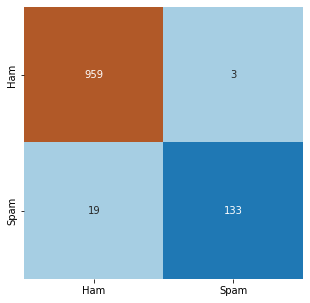

In [36]:
start = time.time()
kf = KFold(n_splits=5,shuffle = True)
sum = 0
svmk_X = email.cleaned_text
svmk_y = email.label
svm_kf = KFold(n_splits=5,shuffle = True)
svm_accuracy = []


for train_index, test_index in kf.split(svmk_X): 
    print("TRAIN:", train_index, "TEST:", test_index)
    svmk_X_train, svmk_X_test = svmk_X[train_index], svmk_X[test_index]
    svmk_y_train, svmk_y_test = svmk_y[train_index], svmk_y[test_index]
    svmk_X_train_dtm = vect.fit_transform(svmk_X_train)
    svmk_X_test_dtm = vect.transform(svmk_X_test)
    linear_classifier = SVC(kernel='linear',probability=False)
    linear_classifier.fit(svmk_X_train_dtm,svmk_y_train)
    linear_ypred = linear_classifier.predict(svmk_X_test_dtm)
    svm_linear_score = metrics.accuracy_score(svmk_y_test, linear_ypred)
    svm_accuracy.append(svm_linear_score)
 

print('Linear: ',round(100*np.mean(svm_accuracy),2),'%')
confusion_mat = metrics.confusion_matrix(svmk_y_test, linear_ypred)
plt.figure(figsize = (5,5))
sns.heatmap(confusion_mat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']);

print("time :", time.time() - start) 

TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [   8   14   17 ... 5547 5555 5561]
TRAIN: [   1    2    5 ... 5568 5569 5570] TEST: [   0    3    4 ... 5562 5565 5571]
TRAIN: [   0    1    3 ... 5567 5568 5571] TEST: [   2    5    7 ... 5566 5569 5570]
TRAIN: [   0    2    3 ... 5569 5570 5571] TEST: [   1    9   10 ... 5554 5564 5567]
TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [   6   11   15 ... 5558 5559 5568]
Linear:  98.13 %
time : 9.03159236907959


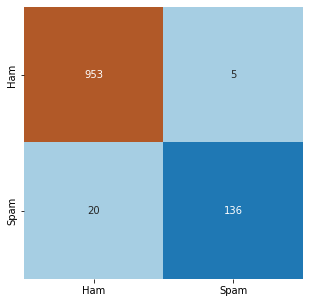

In [ ]:
start = time.time()

svmk_X = email.cleaned_text
svmk_y = email.label
svm_kf = KFold(n_splits=5,shuffle = True)
svm_accuracy = []


for train_index, test_index in kf.split(svmk_X): 
    print("TRAIN:", train_index, "TEST:", test_index)
    svmk_X_train, svmk_X_test = svmk_X[train_index], svmk_X[test_index]
    svmk_y_train, svmk_y_test = svmk_y[train_index], svmk_y[test_index]
    svmk_X_train_dtm = vect.fit_transform(svmk_X_train)
    svmk_X_test_dtm = vect.transform(svmk_X_test)
    linear_classifier = SVC(kernel='linear',probability=True)
    linear_classifier.fit(svmk_X_train_dtm,svmk_y_train)
    linear_ypred = linear_classifier.predict(svmk_X_test_dtm)
    svm_linear_score = metrics.accuracy_score(svmk_y_test, linear_ypred)
    svm_accuracy.append(svm_linear_score)
 

print('Linear: ',round(100*np.mean(svm_accuracy),2),'%')
confusion_mat = metrics.confusion_matrix(svmk_y_test, linear_ypred)
plt.figure(figsize = (5,5))
sns.heatmap(confusion_mat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']);

print("time :", time.time() - start) 

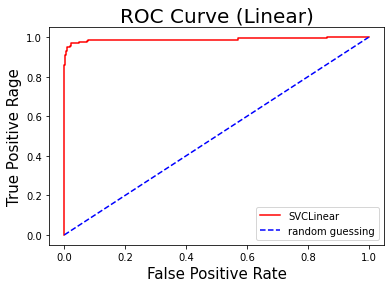

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
svmk_y_pred_proba = linear_classifier.predict_proba(svmk_X_test_dtm)
fpr, tpr, _ = roc_curve(svmk_y_test,svmk_y_pred_proba[:, 1], pos_label='spam')
auc = roc_auc_score(svmk_y_test,svmk_y_pred_proba[:, 1])
plt.plot(fpr,tpr,"r-", label = "SVCLinear")
plt.plot([0,1],[0,1],"b--", label = "random guessing")
plt.xlabel("False Positive Rate",size = 15)
plt.ylabel("True Positive Rage",size = 15)
plt.title('ROC Curve (Linear)', size=20)
plt.legend(loc="lower right")
plt.show()

### Poly kernel

TRAIN: [   0    1    2 ... 5568 5570 5571] TEST: [   9   12   13 ... 5558 5559 5569]
TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [   3    5   15 ... 5546 5551 5552]
TRAIN: [   0    1    2 ... 5565 5569 5570] TEST: [   4    7    8 ... 5567 5568 5571]
TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [   6   11   16 ... 5550 5557 5564]
TRAIN: [   3    4    5 ... 5568 5569 5571] TEST: [   0    1    2 ... 5563 5565 5570]
Poly:  94.94 %
time : 11.766188383102417


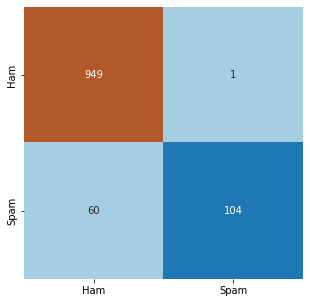

In [ ]:
start = time.time()

svm_kf = KFold(n_splits=5,shuffle = True)
svm_accuracy = []

for train_index, test_index in kf.split(svmk_X): 
    print("TRAIN:", train_index, "TEST:", test_index)
    svmk_X_train, svmk_X_test = svmk_X[train_index], svmk_X[test_index]
    svmk_y_train, svmk_y_test = svmk_y[train_index], svmk_y[test_index]
    svmk_X_train_dtm = vect.fit_transform(svmk_X_train)
    svmk_X_test_dtm = vect.transform(svmk_X_test)
    poly_classifier = SVC(kernel='poly', probability = False)
    poly_classifier.fit(svmk_X_train_dtm,svmk_y_train)
    poly_ypred = poly_classifier.predict(svmk_X_test_dtm)
    svm_poly_score = metrics.accuracy_score(svmk_y_test, poly_ypred)
    svm_accuracy.append(svm_poly_score)

print('Poly: ',round(100*np.mean(svm_accuracy),2),'%')
confusion_mat = metrics.confusion_matrix(svmk_y_test, poly_ypred)
plt.figure(figsize = (5,5))
sns.heatmap(confusion_mat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']);

print("time :", time.time() - start) 

TRAIN: [   0    2    3 ... 5567 5568 5570] TEST: [   1    5   13 ... 5566 5569 5571]
TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [   4    8   14 ... 5558 5561 5567]
TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [   7   15   16 ... 5562 5563 5568]
TRAIN: [   1    2    3 ... 5568 5569 5571] TEST: [   0    6    9 ... 5553 5564 5570]
TRAIN: [   0    1    4 ... 5569 5570 5571] TEST: [   2    3   10 ... 5555 5557 5560]
Poly:  94.51 %
time : 43.13795208930969


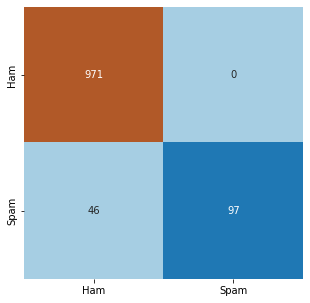

In [ ]:
start = time.time()

svm_kf = KFold(n_splits=5,shuffle = True)
svm_accuracy = []

for train_index, test_index in kf.split(svmk_X): 
    print("TRAIN:", train_index, "TEST:", test_index)
    svmk_X_train, svmk_X_test = svmk_X[train_index], svmk_X[test_index]
    svmk_y_train, svmk_y_test = svmk_y[train_index], svmk_y[test_index]
    svmk_X_train_dtm = vect.fit_transform(svmk_X_train)
    svmk_X_test_dtm = vect.transform(svmk_X_test)
    poly_classifier = SVC(kernel='poly', probability = True)
    poly_classifier.fit(svmk_X_train_dtm,svmk_y_train)
    poly_ypred = poly_classifier.predict(svmk_X_test_dtm)
    svm_poly_score = metrics.accuracy_score(svmk_y_test, poly_ypred)
    svm_accuracy.append(svm_poly_score)

print('Poly: ',round(100*np.mean(svm_accuracy),2),'%')
confusion_mat = metrics.confusion_matrix(svmk_y_test, poly_ypred)
plt.figure(figsize = (5,5))
sns.heatmap(confusion_mat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']);

print("time :", time.time() - start) 

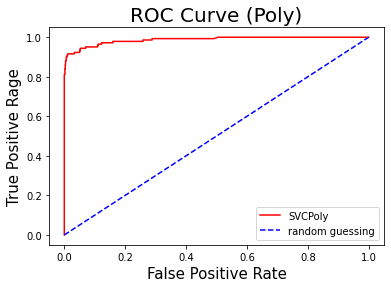

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
svmk_y_pred_proba = poly_classifier.predict_proba(svmk_X_test_dtm)
fpr, tpr, _ = roc_curve(svmk_y_test,svmk_y_pred_proba[:, 1], pos_label='spam')
auc = roc_auc_score(svmk_y_test,svmk_y_pred_proba[:, 1])
plt.plot(fpr,tpr,"r-", label = "SVCPoly")
plt.plot([0,1],[0,1],"b--", label = "random guessing")
plt.xlabel("False Positive Rate",size = 15)
plt.ylabel("True Positive Rage",size = 15)
plt.title('ROC Curve (Poly)', size=20)
plt.legend(loc="lower right")
plt.show()

### Sigmoid kernel

TRAIN: [   0    1    3 ... 5568 5570 5571] TEST: [   2    6   12 ... 5545 5564 5569]
TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [   5    7    9 ... 5533 5535 5567]
TRAIN: [   0    1    2 ... 5569 5570 5571] TEST: [  10   13   20 ... 5555 5556 5561]
TRAIN: [   1    2    5 ... 5567 5569 5571] TEST: [   0    3    4 ... 5566 5568 5570]
TRAIN: [   0    2    3 ... 5568 5569 5570] TEST: [   1    8   18 ... 5563 5565 5571]
Sigmoid:  97.58 %
time : 3.340336322784424


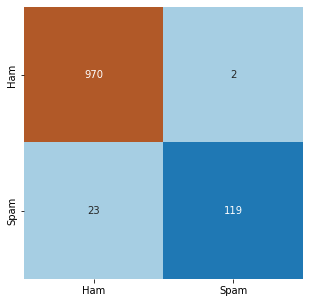

In [ ]:
start = time.time()
svm_kf = KFold(n_splits=5,shuffle = True)
svm_accuracy = []

for train_index, test_index in kf.split(svmk_X): 
    print("TRAIN:", train_index, "TEST:", test_index)
    svmk_X_train, svmk_X_test = svmk_X[train_index], svmk_X[test_index]
    svmk_y_train, svmk_y_test = svmk_y[train_index], svmk_y[test_index]
    svmk_X_train_dtm = vect.fit_transform(svmk_X_train)
    svmk_X_test_dtm = vect.transform(svmk_X_test)
    sigmoid_classifier = SVC(kernel='sigmoid')
    sigmoid_classifier.fit(svmk_X_train_dtm,svmk_y_train)
    sigmoid_ypred = sigmoid_classifier.predict(svmk_X_test_dtm)
    svm_sigmoid_score = metrics.accuracy_score(svmk_y_test, sigmoid_ypred)
    svm_accuracy.append(svm_sigmoid_score)

print('Sigmoid: ',round(100*np.mean(svm_accuracy),2),'%')

confusion_mat = metrics.confusion_matrix(svmk_y_test, sigmoid_ypred)
plt.figure(figsize = (5,5))
sns.heatmap(confusion_mat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam']);
print("time :", time.time() - start) 

In [ ]:
sigmoid_classifier = SVC(kernel='sigmoid',probability = True)
sigmoid_classifier.fit(svmk_X_train_dtm,svmk_y_train)

SVC(kernel='sigmoid', probability=True)

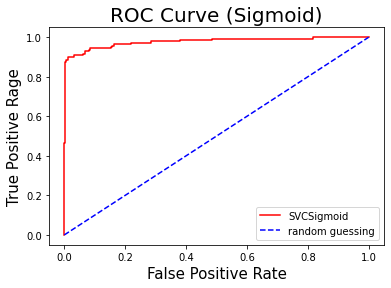

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
svmk_y_pred_proba = sigmoid_classifier.predict_proba(svmk_X_test_dtm)
fpr, tpr, _ = roc_curve(svmk_y_test,svmk_y_pred_proba[:, 1], pos_label='spam')
auc = roc_auc_score(svmk_y_test,svmk_y_pred_proba[:, 1])
plt.plot(fpr,tpr,"r-", label = "SVCSigmoid")
plt.plot([0,1],[0,1],"b--", label = "random guessing")
plt.xlabel("False Positive Rate",size = 15)
plt.ylabel("True Positive Rage",size = 15)
plt.title('ROC Curve (Sigmoid)', size=20)
plt.legend(loc="lower right")
plt.show()

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### 다층 퍼셉트론


In [ ]:
from keras.models import Sequential
model = Sequential() 

X = email.cleaned_text
y = email.label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)

### 그래디언트 최적화 

In [ ]:
from sklearn.neural_network import MLPClassifier
start = time.time()
kf = KFold(n_splits=5,shuffle = True)
sum = 0

### 나이브 베이즈